In [422]:
'''
Assignment 4: Online Retail Customer Segmentation
Dataset: Mall Customers
Link: https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/Mall_Customers.csv
Task:
 Predict spending score category.
 Impute missing values.
 Encode gender.
 Apply StandardScaler to Age & Income.
 Train KNN & evaluate with confusion matrix.

'''

'\nAssignment 4: Online Retail Customer Segmentation\nDataset: Mall Customers\nLink: https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/Mall_Customers.csv\nTask:\n\uf0b7 Predict spending score category.\n\uf0b7 Impute missing values.\n\uf0b7 Encode gender.\n\uf0b7 Apply StandardScaler to Age & Income.\n\uf0b7 Train KNN & evaluate with confusion matrix.\n\n'

In [423]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [424]:
df = pd.read_csv('Mall_Customers.csv')  ## load the dataset

In [425]:
df  ## show the dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [426]:
bins = [0,34,68,100]
labels=['Low','Medium','High']

In [427]:
## create bins for this column

df['Spending_Category'] = pd.cut(df['Spending Score (1-100)'],bins=bins,labels=labels)

In [428]:
df  ## show the new dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending_Category
0,1,Male,19,15,39,Medium
1,2,Male,21,15,81,High
2,3,Female,20,16,6,Low
3,4,Female,23,16,77,High
4,5,Female,31,17,40,Medium
...,...,...,...,...,...,...
195,196,Female,35,120,79,High
196,197,Female,45,126,28,Low
197,198,Male,32,126,74,High
198,199,Male,32,137,18,Low


In [429]:
df1 = df.drop(['CustomerID','Spending Score (1-100)'],axis=1)  ## unnecessary column are deducted from this dataset

In [430]:
df1.head()  ## show new dataset

,Gender,Age,Annual Income (k$),Spending_Category
0,Male,19,15,Medium
1,Male,21,15,High
2,Female,20,16,Low
3,Female,23,16,High
4,Female,31,17,Medium


In [431]:
## unique value of all columns

for i in range(df1.shape[1]):
    print(f'Unique value of {df1.columns[i]} is : ',df1[df1.columns[i]].unique(),'\n')

Unique value of Gender is :  ['Male' 'Female'] 

Unique value of Age is :  [19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 44
 28 56 41] 

Unique value of Annual Income (k$) is :  [ 15  16  17  18  19  20  21  23  24  25  28  29  30  33  34  37  38  39
  40  42  43  44  46  47  48  49  50  54  57  58  59  60  61  62  63  64
  65  67  69  70  71  72  73  74  75  76  77  78  79  81  85  86  87  88
  93  97  98  99 101 103 113 120 126 137] 

Unique value of Spending_Category is :  ['Medium', 'High', 'Low']
Categories (3, object): ['Low' < 'Medium' < 'High'] 



In [432]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [433]:
le = LabelEncoder()  ## create object of label encoder

In [434]:
df1['Gender'] = le.fit_transform(df1['Gender'])  ## fit and transform on label encoder of this column

In [435]:
oe = OrdinalEncoder(categories=[['Low','Medium','High']])  ## create object ordinal encoder for Spending_Category columns

In [436]:
s = df1['Spending_Category'].values

In [437]:
oe.fit(s.reshape(-1,1))  ## fit this column

,categories,"[['Low', 'Medium', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [438]:
df1['Spending_Category'] = oe.transform(s.reshape(-1,1))  ## transform on ordinal encoder of this column

In [439]:
df1  ## show new dataset

,Gender,Age,Annual Income (k$),Spending_Category
0,1,19,15,1.0
1,1,21,15,2.0
2,0,20,16,0.0
3,0,23,16,2.0
4,0,31,17,1.0
...,...,...,...,...
195,0,35,120,2.0
196,0,45,126,0.0
197,1,32,126,2.0
198,1,32,137,0.0


C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


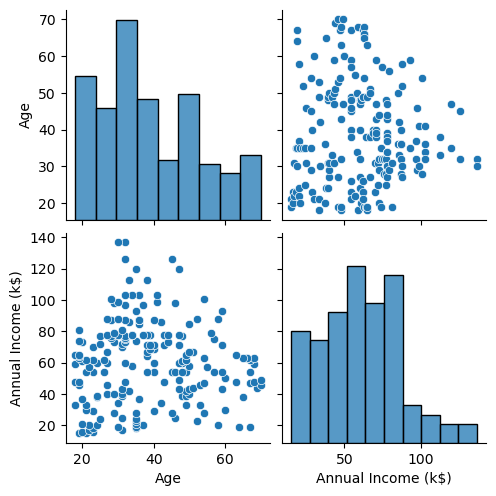

In [440]:
sns.pairplot(df1[['Age','Annual Income (k$)']])  ## show graphically behaviour with each of this column

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

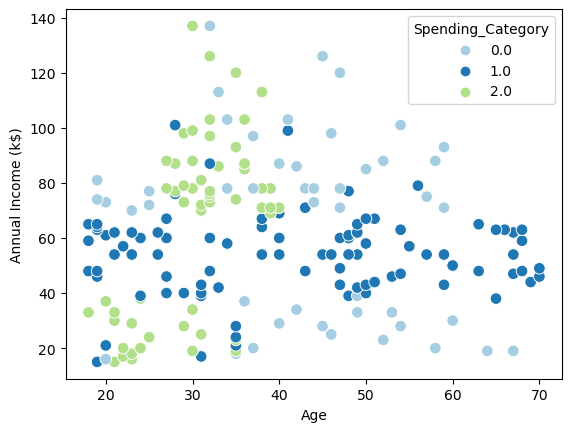

In [441]:
## show scatter plot age v/s annual income

sns.scatterplot(x='Age',
                y='Annual Income (k$)' , data=df1,hue = 'Spending_Category',palette='Paired',s=70)


In [442]:
x = df1.drop(['Spending_Category'],axis=1)

In [443]:
y = df1['Spending_Category']

In [444]:
from sklearn.model_selection import train_test_split

In [445]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)  ## spliting 80% for training and 20% for testing 

In [446]:
from sklearn.preprocessing import StandardScaler

In [447]:
scaler = StandardScaler()  ##create object of standard scaler

In [448]:
col = ['Age','Annual Income (k$)']

In [449]:
x_train[col] = scaler.fit_transform(x_train[col])  ## fit and transform on x_train dataset of this selected two columns

In [450]:
x_train

,Gender,Age,Annual Income (k$)
193,0,-0.066379,1.884125
153,0,-0.066379,0.589512
44,0,0.712469,-0.853058
5,0,-1.199249,-1.666815
91,1,-1.482466,-0.113279
...,...,...,...
56,0,0.854078,-0.668113
127,1,0.075230,0.330589
48,0,-0.703618,-0.816069
192,1,-0.420401,1.884125


In [451]:
x_test[col] = scaler.transform(x_test[col])   ##  transform on x_train dataset of this selected two columns

In [452]:
from sklearn.neighbors import KNeighborsClassifier

In [453]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [454]:
## sorted accuracy score and n_neighbors together

acc = []
pl = []
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train , y_train)
    y_pred = knn.predict(x_test)
    pl.append(accuracy_score(y_test,y_pred))
    a = (accuracy_score(y_test,y_pred),i)
    acc.append(a)

sort = sorted(acc, key=lambda x: x[0] , reverse=True)
print(sort)
b=sort[0][1]
print(b)

[(0.875, 6), (0.875, 7), (0.875, 8), (0.875, 9), (0.875, 10), (0.875, 12), (0.85, 5), (0.85, 11), (0.85, 14), (0.825, 3), (0.8, 13), (0.775, 4), (0.75, 1), (0.7, 2)]
6


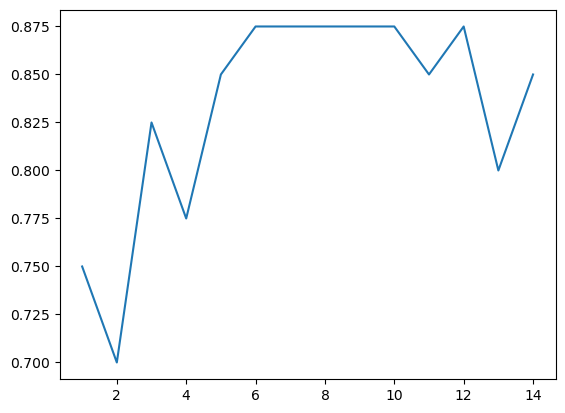

In [455]:
plt.plot(range(1,15),pl)  ## show plot accuracy score basis on n_neighbors 

In [456]:
knn = KNeighborsClassifier(n_neighbors=b)  ## create ibject of knn

In [457]:
knn.fit(x_train,y_train)   ## fit the model on knn

,n_neighbors,6
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [458]:
y_pred = knn.predict(x_test) ## predict on model

In [459]:
accuracy_score(y_test,y_pred)  ## check accuracy score of the model

0.875

[[ 5  1  0]
 [ 0 20  1]
 [ 1  2 10]]


Text(50.722222222222214, 0.5, 'Actual Values')

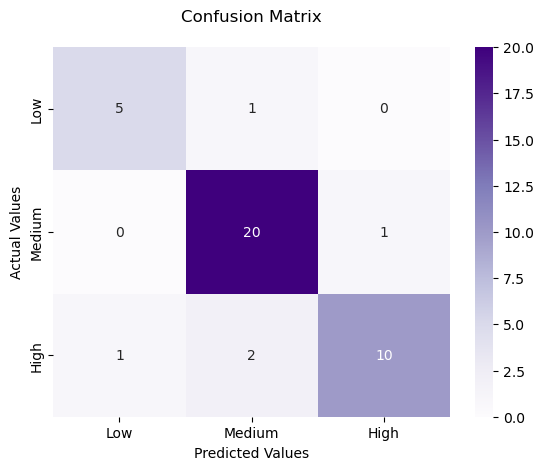

In [460]:
## show confusion matrix of this model

cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='Purples',xticklabels=['Low','Medium','High'],yticklabels=['Low','Medium','High'])
plt.title('Confusion Matrix\n')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [461]:
print(classification_report(y_test,y_pred))  ## show classification report of this model 

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83         6
         1.0       0.87      0.95      0.91        21
         2.0       0.91      0.77      0.83        13

    accuracy                           0.88        40
   macro avg       0.87      0.85      0.86        40
weighted avg       0.88      0.88      0.87        40



In [ ]:
'''
model interpretation :
                1. Overall Model Accuracy (88%):

                            The model correctly classifies 88% of customers into their respective segments.

                            This indicates good predictive performance for a multi-class segmentation problem.

                            Proper handling of missing values, encoding, and standard scaling positively impacted the results.
                4. Precision Analysis:

                    i) High precision across all segments means:

                        a)The model makes few false positive predictions.

                        b)Predicted customer segments are reliable.
                5. Recall Analysis:

                        Recall is highest for Segment 1, showing strong sensitivity.

                        Slightly lower recall for Segment 2 indicates room for improvement in capturing all customers of this segment.
                6. F1-Score Evaluation:

                        F1-scores range from 0.83 to 0.91, indicating:

                        A good balance between precision and recall.

                        Stable and reliable classification across segments.
                7. Macro vs Weighted Average

                        Macro Avg F1 (0.86): Model performs well across all segments equally.

                        Weighted Avg F1 (0.87): Overall performance is not heavily biased by class size.

                        This suggests balanced model behavior, even with unequal class distribution.
                8. Impact of Preprocessing:

                        Label Encoding & Ordinal Encoding: Properly transformed categorical variables.

                        Standard Scaling: Essential for distance-based or gradient-based learning.

                        Together, they helped improve model stability and accuracy.




Conclusion :
        1. The model achieves strong overall accuracy (88%), making it effective for customer segmentation.
        2. Confusion matrix shows mostly correct predictions with minimal misclassification.
        3. The model maintains a good balance between precision and recall, as reflected in F1-scores.
        4. Preprocessing steps (missing value handling, encoding, scaling) significantly contributed to model performance.
        5. Overall, the model is robust, reliable, and suitable for practical customer segmentation tasks.

'''